# Unsupervised Learning Demos

In [1]:
import numpy as np
np.random.seed(2) # 2 ok
import scipy.stats as st
import matplotlib.pyplot as plt

from cluster import *

# K-means clustering

## Generate data

In [2]:
k = 8; nDim = 2; sf = 3

# Regular polygon centroids
#thetas = [2 * np.pi / k * i for i in range(k)]
#mus = np.array([(np.cos(t), np.sin(t)) for t in thetas])
#mus *= sf

## y = x line means
mus = np.random.rand(k, nDim)
for i in range(mus.shape[0]):
    mus[i] += i - (mus.shape[0] // 2)
mus *= sf

# Generate covariance matrices that are identities
sigmas = np.array([np.eye(nDim) for _ in range(k)])
sigmas[:, 0, 1] = 0.7
sigmas[:, 1, 0] = 0.7

data, inds = GMMSamples(mus, sigmas, nPoints=1000, retLatent=True)

## Do kmeans clustering and visualize the representatives

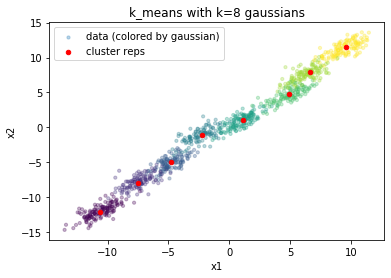

In [3]:
pars, clust, allRep, allC, allP = kmeans(data, k=k, retAll=True)
reps = pars

plt.scatter(data[:, 0], data[:, 1], s=10, alpha=0.3, c=inds);
plt.scatter(reps[:, 0], reps[:,1], s=20, c='r');
plt.xlabel('x1'); plt.ylabel('x2'); plt.title(f'k_means with k={k} gaussians');
plt.legend(['data (colored by gaussian)', 'cluster reps']);

# Gaussian Mixture Models

## Fit a GMM

In [4]:
pars, clust_probs, allRep, allC, allP = GMM(data, k=k, retAll=True)
reps, var, pi = pars

## Visualize the produced gaussians

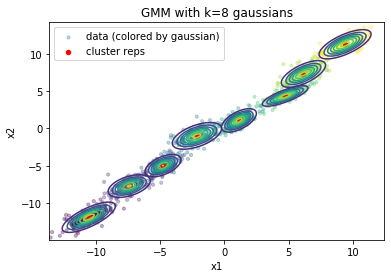

In [5]:
plt.scatter(data[:, 0], data[:, 1], s=10, alpha=0.3, c=inds);
plt.scatter(reps[:, 0], reps[:,1], s=20, c='r');
plt.xlabel('x1'); plt.ylabel('x2'); plt.title(f'GMM with k={k} gaussians');
plt.legend(['data (colored by gaussian)', 'cluster reps']);

for i in range(k):
    mean, cov_m = reps[i], var[i]
    x_mu, x_std, y_mu, y_std = mean[0], np.sqrt(cov_m[0,0]), mean[1], np.sqrt(cov_m[1,1])
    x = np.linspace(x_mu - 3 * x_std, x_mu + 3 * x_std, 100)
    y = np.linspace(y_mu - 3 * y_std, y_mu + 3 * y_std, 100)
    xx, yy = np.meshgrid(x, y)
    vals = np.vstack([xx.ravel(), yy.ravel()]).T
    pdf_vals = st.multivariate_normal.pdf(vals, mean=mean, cov=cov_m).reshape(xx.shape)
    plt.contour(xx, yy, pdf_vals)

## Visualize the convergence

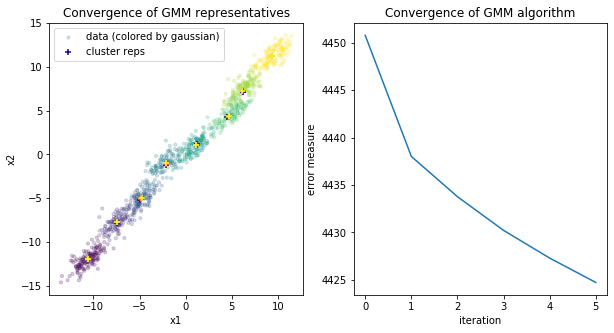

In [6]:
plt.subplot(121)
plt.scatter(data[:, 0], data[:, 1], s=10, alpha=0.2, c=inds, label='data (colored by gaussian)');
stride = max(1, len(allRep) // 10)
colors = plt.cm.plasma(np.linspace(0, 1, len(allRep[::stride])))
for i, rep in enumerate(allRep[::stride]):
    plt.scatter(rep[:, 0], rep[:,1], marker='+', s=40, color=colors[i], label='reps');
plt.xlabel('x1'); plt.ylabel('x2'); plt.title(f'Convergence of GMM representatives');
plt.legend(['data (colored by gaussian)', 'cluster reps']);    

plt.subplot(122)
plt.plot(allP)
plt.xlabel('iteration'); plt.ylabel('error measure'); plt.title(f'Convergence of GMM algorithm');
plt.gcf().set_size_inches(10, 5)